# Final script for inverse problem: taking in observed lightcurve and extracting parameters using PHOEBE

In [88]:
# Necessary Imports
import matplotlib.pyplot as plt

plt.rc('font', family='serif', size=14, serif='STIXGeneral')
plt.rc('mathtext', fontset='stix')

import phoebe
import numpy as np
import pandas as pd
from astropy.time import Time
from astropy.timeseries import TimeSeries


logger = phoebe.logger('error')
b = phoebe.default_binary(contact_binary=True)

### Step 1) Read in CSV that has already had photometry/ differential mag done

In [89]:
#Read in .csv with only target data
#df = pd.read_csv("target_phot_2023_11_19-22.csv")

#Read in .csv with julian time
df = pd.read_csv("jd_photometry.csv")

/tmp/ipykernel_767/3600713204.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("jd_photometry.csv")


In [90]:
def julianToDatetime(hjd):
    time = Time(hjd, format='jd', scale='tdb')
    return time.to_datetime()

def datetimeToJulian(datetime):
  return Time(datetime).jd

In [91]:
df["times"]=pd.to_datetime(df["timestamp"],format="%Y-%m-%dT%H:%M:%S.0000")
df["julian"]= [datetimeToJulian(t) for t in df["times"]]

In [92]:
_NN_apertures=8

In [93]:
#dflux calculations
#if you do this and it is all null you've read in the target csv, not the all csv
for ap_num in range(_NN_apertures):
    mag_title = 'objflux_' + str(ap_num)  
    refmag_title = 'refflux_' + str(ap_num)  
    dmag_title = 'dflux_' + str(ap_num)  
    print(df[df['id']==2][mag_title])
    df[refmag_title]=df[df['id']==2][mag_title]
    print(df[refmag_title])
    df[refmag_title].fillna(method='ffill', inplace=True)
    print(df[refmag_title])
    df[refmag_title].fillna(method='bfill', inplace=True)
    print(df[refmag_title])

    df[dmag_title]=df[mag_title]-df[refmag_title]

df

18       180352.862384
37       173067.011736
56       156332.679385
62       156332.679385
96       169419.746811
             ...      
47937     65473.842888
47952     51340.177212
47977     89782.817060
47997    101178.117976
48015     79180.384819
Name: objflux_0, Length: 2401, dtype: float64
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
48015    79180.384819
48016             NaN
48017             NaN
48018             NaN
48019             NaN
Name: refflux_0, Length: 48020, dtype: float64
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
48015    79180.384819
48016    79180.384819
48017    79180.384819
48018    79180.384819
48019    79180.384819
Name: refflux_0, Length: 48020, dtype: float64
0        180352.862384
1        180352.862384
2        180352.862384
3        180352.862384
4        180352.862384
        

/tmp/ipykernel_767/1737200200.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[refmag_title].fillna(method='ffill', inplace=True)
/tmp/ipykernel_767/1737200200.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[refmag_title].fillna(method='bfill', inplace=True)
/tmp/ipykernel_767/1737200200.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[refmag_title].fillna(method='ffill', inplace=True)
/tmp/ipykernel_767/1737200200.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[refmag_title].fillna(method='bfill', inplace=True)
/tmp/ipykernel_767/1737200200.py:10: FutureWarning: Series.fillna with 'method' is deprecated an

18       269047.896654
37       253154.374787
56       294637.913440
62       294637.913440
96       267647.278038
             ...      
47937    271771.908177
47952    268649.048861
47977    273827.900207
47997    274745.141411
48015    274874.312934
Name: objflux_7, Length: 2401, dtype: float64
0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
             ...      
48015    274874.312934
48016              NaN
48017              NaN
48018              NaN
48019              NaN
Name: refflux_7, Length: 48020, dtype: float64
0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
             ...      
48015    274874.312934
48016    274874.312934
48017    274874.312934
48018    274874.312934
48019    274874.312934
Name: refflux_7, Length: 48020, dtype: float64
0        269047.896654
1        269047.896654
2        269047.896654
3        269047.896654
4        

/tmp/ipykernel_767/1737200200.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[refmag_title].fillna(method='ffill', inplace=True)
/tmp/ipykernel_767/1737200200.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[refmag_title].fillna(method='bfill', inplace=True)


,Unnamed: 0,id,xcenter,ycenter,aperture_sum_0,aperture_sum_err_0,aperture_sum_1,aperture_sum_err_1,aperture_sum_2,aperture_sum_err_2,...,refflux_3,dflux_3,refflux_4,dflux_4,refflux_5,dflux_5,refflux_6,dflux_6,refflux_7,dflux_7
0,0,1,1093.114558,503.665894,893709.156665,1059.951968,1.501192e+06,1379.107240,1.678403e+06,1468.080146,...,283723.692391,1.390437e+06,282994.519718,1.412837e+06,279779.108305,1.425019e+06,275518.981617,1.431329e+06,269047.896654,1.435658e+06
1,3,4,1348.356598,46.406548,51868.693757,266.828769,8.939314e+04,370.389419,1.194205e+05,454.457035,...,283723.692391,-2.153283e+05,282994.519718,-2.177898e+05,279779.108305,-2.197518e+05,275518.981617,-2.214923e+05,269047.896654,-2.216946e+05
2,4,5,881.917816,1146.941362,25730.743518,196.278257,5.073296e+04,298.099141,7.804644e+04,393.463566,...,283723.692391,-2.574899e+05,282994.519718,-2.607578e+05,279779.108305,-2.623873e+05,275518.981617,-2.635483e+05,269047.896654,-2.640633e+05
3,5,6,1100.969276,752.501809,22177.113619,184.616133,4.532798e+04,286.542966,7.205777e+04,383.832959,...,283723.692391,-2.615665e+05,282994.519718,-2.642937e+05,279779.108305,-2.648632e+05,275518.981617,-2.652018e+05,269047.896654,-2.644318e+05
4,6,7,1339.724001,458.015888,20028.529269,177.193077,4.190056e+04,278.967020,6.863395e+04,378.216828,...,283723.692391,-2.660590e+05,282994.519718,-2.684308e+05,279779.108305,-2.694767e+05,275518.981617,-2.702122e+05,269047.896654,-2.706390e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48015,1,2,1283.552717,921.375323,84722.330284,335.059157,2.101065e+05,536.730834,2.859603e+05,643.976674,...,255210.125024,0.000000e+00,263848.421045,0.000000e+00,269175.110642,0.000000e+00,272036.118592,0.000000e+00,274874.312934,0.000000e+00
48016,0,1,1093.114558,503.665894,490605.098316,787.158242,1.177891e+06,1223.850739,1.501675e+06,1390.808908,...,255210.125024,1.298651e+06,263848.421045,1.334222e+06,269175.110642,1.348600e+06,272036.118592,1.353569e+06,274874.312934,1.352884e+06
48017,18,19,416.430790,7.567355,0.000000,79.760423,0.000000e+00,150.753812,0.000000e+00,210.711763,...,255210.125024,-3.168570e+05,263848.421045,-3.546379e+05,269175.110642,-3.945095e+05,272036.118592,-4.373290e+05,274874.312934,-4.855445e+05
48018,8,9,753.497377,976.209679,10710.688551,140.534999,3.388769e+04,260.396841,6.399713e+04,370.475292,...,255210.125024,-2.391756e+05,263848.421045,-2.469770e+05,269175.110642,-2.522057e+05,272036.118592,-2.549673e+05,274874.312934,-2.579071e+05


In [94]:
#Shift all flux up so we have no negative flux values
min_flux = abs(df["dflux_5"].min())
df["dflux"] = df["dflux_5"] + min_flux

In [95]:
print(len(df.index))
#print(len(df2.index))

48020


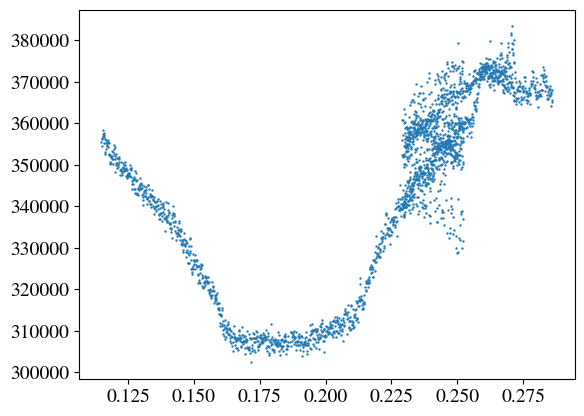

In [96]:
#scatter plot of lc data (observed)
period = 0.3439788
targ_index = 3
df_targ=df[df["id"]==targ_index]
plt.scatter(df_targ["julian"]%period,df_targ["dflux"], s=0.5)
#plt.gca().invert_yaxis()

In [97]:
#Output new data to .csv
df_targ.to_csv("target_phot_forPhoebe.csv")

### Step 2) Run Ebai estimator

In [98]:
# Cut only to good date range
df_targ=df_targ[np.logical_or(np.logical_and(df_targ['julian']>2460260, df_targ['julian']<2460262),np.logical_and(df_targ['julian']>2460269, df_targ['julian']<2460270))]

#make times and fluxes arrays for PHOEBE
epoch = 2460257
fluxes = np.array(df_targ["dflux"])
times = np.array(df_targ["julian"])
print(times)
times=((times)-(epoch))
print(times)

# df_targ.set_index(pd.DatetimeIndex(df_targ['julian']), inplace=True)
# ts = TimeSeries.from_pandas(df_targ)
# times = ts["time"].mjd

[2460260.66884259 2460260.66895833 2460260.66907407 ... 2460260.83978009
 2460260.83989583 2460260.84001157]
[3.66884259 3.66895833 3.66907407 ... 3.83978009 3.83989583 3.84001157]


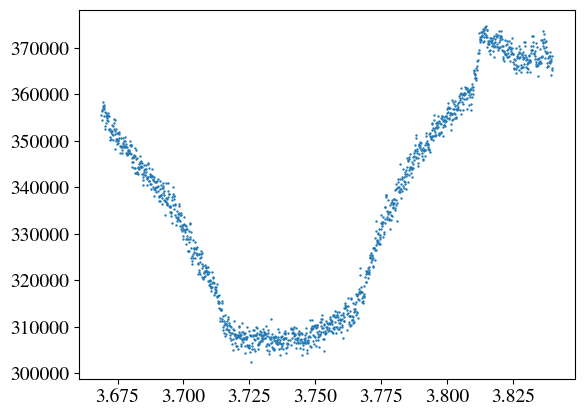

In [99]:
plt.scatter(times,df_targ["dflux"], s=0.5)

In [100]:
#add our observed data into phoebe
orbphases = phoebe.linspace(0,1,101)
meshphases = phoebe.linspace(0,1,51)
b.add_dataset('lc', times=times, fluxes=fluxes, dataset='lc01')
b.add_dataset('orb', compute_phases=orbphases, dataset='orb01')
b.add_dataset('mesh', compute_phases=meshphases, dataset='mesh01', columns=['teffs'])


<ParameterSet: 85 parameters | contexts: dataset, compute, figure, constraint>

In [101]:
# s_epoch = 2460257
# s_period = 0.3439788
# forward_times = np.linspace(s_epoch, s_epoch*10*period, 1000)
# # forward_fluxes = np.ones(len(forward_times))

# b.add_dataset('lc', times=forward_times, dataset='lc01')

In [102]:
#input Christopoulou data 

# print(phoebe.list_online_passbands())
b.set_value('passband', 'SDSS:g')
b.set_value_all('ld_mode', 'lookup')
b.set_value_all('ld_mode_bol', 'lookup')
b.set_value_all('atm', 'ck2004')

# b.set_value('pblum_mode', 'dataset-scaled')
b.set_value_all('gravb_bol', 0.32)
b.set_value_all('irrad_frac_refl_bol', 0.5)

b['period@binary'] = 0.3439788   # period = 0.34 day
b['t0_supconj'] = 0.14
b['incl@binary'] = 89.6
b['Av'] = 0.179

b['teff@primary'] = 5742
b['teff@secondary'] = 5600

b.flip_constraint('mass@primary', solve_for='sma@binary')
b['mass@primary@component'] = 1.25
b['q'] = 0.110

b['requiv@primary'] = 1.37

print(b.run_checks())   # check if run_compute is possible
print(b)

Run Checks Report: PASS

PHOEBE Bundle: 250 parameters
                        t0@system: 0.0 d
                        ra@system: 0.0 deg
                       dec@system: 0.0 deg
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
C                      ebv@system: 0.057741935483870965
                        Av@system: 0.179
                        Rv@system: 3.1
                 hierarchy@system: orbit:binary(star:primary, star:secondary, envelope:contact_envelope)
         requiv@primary@component: 1.37 solRad
C    requiv_max@primary@component: 1.3922159789270905 solRad
C    requiv_min@primary@component: 1.3199515362463703 solRad
           teff@primary@component: 5742.0 K
C          logg@primary@component: 4.261536510961695
        syncpar@primary@component: 1.0
C        period@primary@component: 0.3439788 d
C          freq@primary@component: 18.26619838199331 rad / d
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.

In [103]:
b.run_compute(model='default')

100%|██████████| 1541/1541 [02:04<00:00, 12.35it/s]


<ParameterSet: 529 parameters | kinds: lc, mesh, orb>

In [104]:
print(b["lc01"])

ParameterSet: 32 parameters
               times@lc01@dataset: [3.66884259 3.66895833 3.66907407 ... 3.83978009
 3.83989583 3.84001157] d
              fluxes@lc01@dataset: [355455.61240164 356520.26664499 354556.65118186 ...
 368140.82935407 365729.4753995  365143.26298366] W / m2
            passband@lc01@dataset: SDSS:g
    intens_weighting@lc01@dataset: energy
       compute_times@lc01@dataset: [] d
C     compute_phases@lc01@dataset: []
           phases_t0@lc01@dataset: t0_supconj
        mask_enabled@lc01@dataset: True
         mask_phases@lc01@dataset: []
        solver_times@lc01@dataset: auto
              sigmas@lc01@dataset: [] W / m2
          pblum_mode@lc01@dataset: component-coupled
     pblum_component@lc01@dataset: primary
             l3_mode@lc01@dataset: flux
                  l3@lc01@dataset: 0.0 W / m2
             exptime@lc01@dataset: 0.0 s
    enabled@lc01@phoebe01@compute: True
      fti_method@phoebe01@compute: none
     ld_mode@primary@lc01@dataset: lookup
 

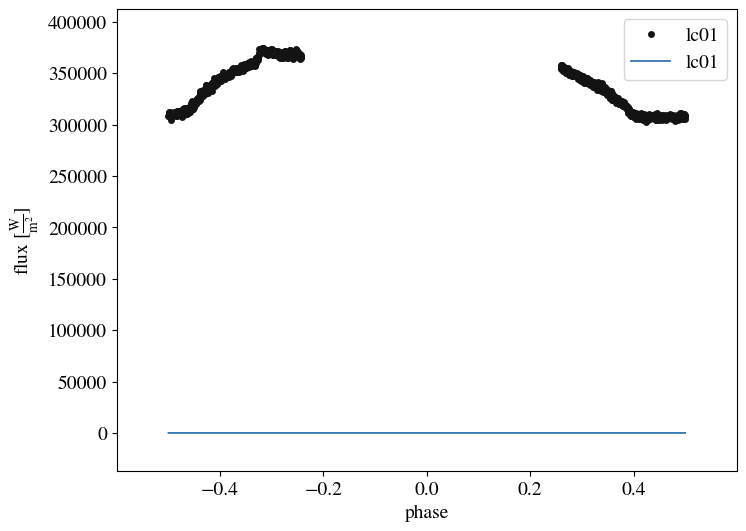

bruh


In [105]:
# simple plotting
b.plot('lc01', x='phase', s=0.008, legend=True, show=True, save='./DN/lightCurve_forwardModel.png')   # plot lc data and forward model
print("bruh")
#b.plot('mesh01', phase=0, legend=True, fc='teffs', ec='None', fcmap='viridis', show=True)   # plot mesh w/ temp color @t0
# animations
# b.plot(y={'orb':'ws'}, ylim={'lc':(0.4*10**10,0.8*10**10)}, size=0.008, fc={'mesh':'teffs'}, ec={'mesh':'None'}, 
#         fcmap='viridis', animate=True, save='./DN/animations_sync.gif')   # sync animation for lc, orb, mesh
# b.plot('orb01', y='ws', legend=True, animate=True, save='./DN/orb2d.gif')   # animate face-on 2d orbit
# b.plot('orb01', projection='3d', legend=True, animate=True, save='./DN/orb3d.gif')   # animate 3d orbit
# b.plot('mesh01', fc='teffs', ec='None', fcmap='viridis', legend=True, animate=True, save='./DN/mesh.gif')   # animate mesh

In [106]:
out_df4 = pd.DataFrame()
out_df4["christ_phases"] = b["times@lc01@default@model"]._value.value
out_df4["christ_fluxes"] = b["fluxes@default@model"]._value.value
out_df4.to_csv("christOut.csv")

In [107]:
# start of inverse problem: add and run KNN estimator
b.add_solver('estimator.ebai', ebai_method='knn', solver='ebai_knn', overwrite=True)
b.run_solver('ebai_knn', solution='ebai_knn_sol', phase_bin=False)
print(b.adopt_solution('ebai_knn_sol', trial_run=True))   # see proposed KNN solution params before adopting


/home/nadiabolef/contactBinaries/venv/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/nadiabolef/contactBinaries/venv/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ParameterSet: 5 parameters
   t0_supconj@binary@orbit@com...: -0.005340874123054479 d
   teffratio@binary@orbit@comp...: 0.8538534461742996
      incl@binary@orbit@component: 43.04930734420137 deg
   fillout_factor@contact_enve...: 0.5208636793200399
         q@binary@orbit@component: 3.777782395885582


In [108]:
b.flip_constraint('teffratio', solve_for='teff@secondary')

<ConstraintParameter: {teff@secondary@component} = {teffratio@binary@component} * {teff@primary@component} (solar units) => 5600.0 K>

In [109]:
# if adopt all proposed params, uncomment below:
b.flip_constraint('pot@contact_envelope', solve_for='requiv@primary')
print(b.adopt_solution('ebai_knn_sol'))

ParameterSet: 34 parameters
      t0_supconj@binary@component: -0.005340874123054479 d
       teffratio@binary@component: 0.8538534461742996
            incl@binary@component: 43.04930734420137 deg
C  fillout_factor@contact_enve...: 0.5208636793200399
               q@binary@component: 3.777782395885582
C     t0_perpass@binary@component: -0.09133557412305447 d
C         t0_ref@binary@component: -0.005340874123054479 d
C     compute_phases@lc01@dataset: []
C     compute_times@orb01@dataset: [-0.00534087 -0.00190109  0.0015387  ...
  0.33175835  0.33519814  0.33863793] d
C    compute_times@mesh01@dataset: [-0.00534087  0.0015387   0.00841828 ...
  0.32487877  0.33175835  0.33863793] d
C        teff@secondary@component: 4902.826487932828 K
C          asini@binary@component: 2.5587124107208643 solRad
C         asini@primary@component: 2.0231684703094475 solRad
C          incl@primary@component: 43.04930734420137 deg
C       asini@secondary@component: 0.5355439404114167 solRad
C        incl

In [110]:
b.run_compute(model='ebai_knn_model', overwrite=True)

100%|██████████| 1541/1541 [03:07<00:00,  8.20it/s]


<ParameterSet: 529 parameters | kinds: lc, mesh, orb>

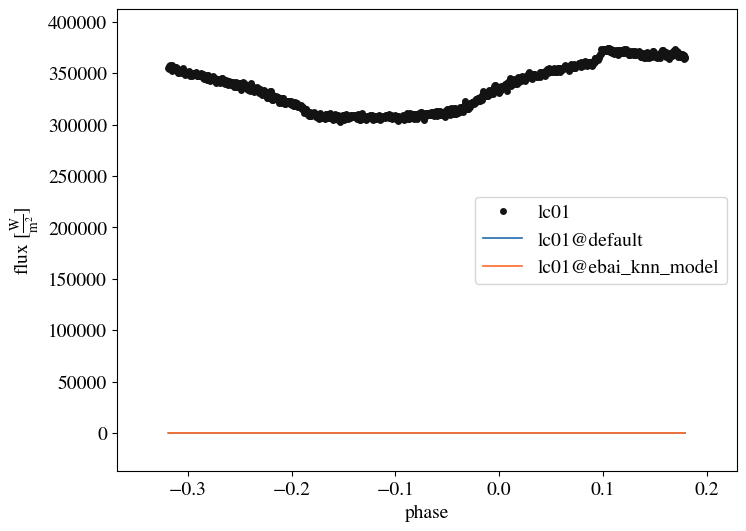

(<autofig.figure.Figure | 1 axes | 3 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [111]:
b.plot('lc01', x='phase', ls='-', s=0.008, legend=True, show=True, save='./DN/lc_inverse_obs_no_mod.png')
# b.plot('mesh01', fc='teffs', ec='None', fcmap='viridis', animate=True, save='./DN/mesh_inverse_obs.gif')
# b.plot(y={'orb':'ws'}, ylim={'lc':(0.4*10**10,0.8*10**10)}, size=0.008, fc={'mesh':'teffs'}, ec={'mesh':'None'}, 
#         fcmap='viridis', animate=True, save='./DN/animations_sync_inverse_obs.gif')
# b.plot('orb01', y='ws', legend=True, animate=True, save='./DN/orb2d_inverse_obs.gif')
# b.plot('orb01', projection='3d', legend=True, animate=True, save='./DN/orb3d_inverse_obs.gif')
# b.plot('mesh01', fc='teffs', ec='None', fcmap='viridis', animate=True, save='./DN/mesh_inverse_obs.gif')


In [112]:
b.get_dataset("lc01").__dict__

{'_bundle': <PHOEBE Bundle: 1333 parameters | contexts: setting, solver, system, component, dataset, model, solution, compute, constraint, figure>,
 '_filter': {'dataset': 'lc01', 'context': 'dataset'},
 '_params': [<Parameter: times=[3.66884259 3.66895833 3.66907407 ... 3.83978009
   3.83989583 3.84001157] d | keys: description, value, default_unit, visible_if, required_shape, copy_for, readonly, advanced, latexfmt>,
  <Parameter: fluxes=[355455.61240164 356520.26664499 354556.65118186 ...
   368140.82935407 365729.4753995  365143.26298366] W / m2 | keys: description, value, default_unit, visible_if, required_shape, copy_for, readonly, advanced, latexfmt>,
  <Parameter: passband=SDSS:g | keys: description, choices, value, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: intens_weighting=energy | keys: description, choices, value, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: compute_times=[] d | keys: description, value, default_unit, visible_if,

In [113]:
s = b["ebai_phases@ebai_knn@ebai_knn_sol@ebai@solution"]
print(s)
# for param in s._bundle._params:
#     # print(param._qualifier,"-",param._description)
#     print(param)
# # print(s._description)
# # print(s.__dict__)
# print("--")
# v = b["fitted_values@ebai_knn@ebai_knn_sol@ebai@solution"]
# # print(s.__dict__)
# print(v)
# print("---")
# print(v.__dict__)


Parameter: ebai_phases@ebai_knn_sol@solution
                       Qualifier: ebai_phases
                     Description: input phases to ebai
                           Value: [-0.5   -0.495 -0.49  ...  0.49   0.495  0.5  ]
                  Constrained by: 
                      Constrains: None
                      Related to: None



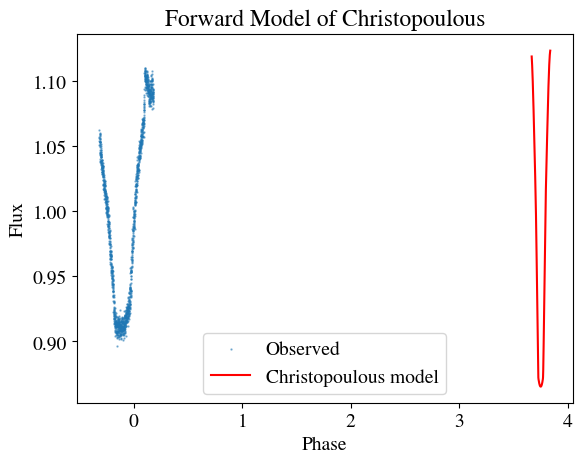

In [114]:
out_df1 = pd.DataFrame()
out_df2 = pd.DataFrame()
out_df3 = pd.DataFrame()


d = b.get_dataset("lc01").get_parameter(qualifier='fluxes')._value.value # W/m^2
t = b.get_dataset("lc01").get_parameter(qualifier='times')._value.value # Julian?
# out_df["fluxes"] = d
# out_df["times"] = t



s = b["ebai_knn@ebai_knn_sol@ebai@solution"]

out_df1["ebai_phase"] = b["ebai_phases@ebai_knn@ebai_knn_sol@ebai@solution"]._value.value
out_df1["ebai_fluxes"] = b["ebai_fluxes@ebai_knn@ebai_knn_sol@ebai@solution"]._value.value

out_df2["input_phases"] = b["input_phases@ebai_knn@ebai_knn_sol@ebai@solution"]._value.value
out_df2["input_fluxes"] = b["input_fluxes@ebai_knn@ebai_knn_sol@ebai@solution"]._value.value

out_df3["christ_phases"] = b["times@lc01@default@model"]._value.value
out_df3["christ_fluxes"] = b["fluxes@default@model"]._value.value

out_df1.to_csv("./EbaiData.csv")
out_df2.to_csv("./ObsData.csv")
out_df3.to_csv("./ChristData.csv")



# for param in s._params:
#     print(param._qualifier,"-",param._description)
# # print(s._description)
# # print(s.__dict__)
# print("--")
# v = b["fitted_values@ebai_knn@ebai_knn_sol@ebai@solution"]
# # print(s.__dict__)
# print(v)
# print("---")
# print(v.__dict__)

# plt.scatter(t,d)
plt.scatter(out_df2["input_phases"], out_df2["input_fluxes"], label="Observed",alpha=0.5,s=0.5)

# plt.plot(out_df1["ebai_phase"], out_df1["ebai_fluxes"], label="EBAI model",c="orange")
plt.plot(out_df3["christ_phases"], out_df3["christ_fluxes"], label="Christopoulous model",c="red")

plt.legend()
plt.ylabel("Flux")
plt.xlabel("Phase")
plt.title("Forward Model of Christopoulous")
plt.savefig("christ_fit.png")
plt.show()
# out_df["times"] = np.array(b.get_dataset("lc01").get_parameter(qualifier='times'))
# out_df["fluxes"] = np.array()

# ValueError: 13 results found: ['orbit@ebai_knn@ebai_knn_sol@ebai@solution', 'input_phases@ebai_knn@ebai_knn_sol@ebai@solution', 'input_fluxes@ebai_knn@ebai_knn_sol@ebai@solution', 'input_sigmas@ebai_knn@ebai_knn_sol@ebai@solution', 'ebai_phases@ebai_knn@ebai_knn_sol@ebai@solution', 'ebai_fluxes@ebai_knn@ebai_knn_sol@ebai@solution', 'fitted_twigs@ebai_knn@ebai_knn_sol@ebai@solution', 'fitted_values@ebai_knn@ebai_knn_sol@ebai@solution', 'fitted_units@ebai_knn@ebai_knn_sol@ebai@solution', 'adopt_parameters@ebai_knn@ebai_knn_sol@ebai@solution', 'adopt_distributions@ebai_knn@ebai_knn_sol@ebai@solution', 'adopt_values@ebai_knn@ebai_knn_sol@ebai@solution', 'comments@ebai_knn@ebai_knn_sol@ebai@solution']
